In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot colors


In [2]:
pca_color = 'palevioletred'
pca_color_2 = 'lightcoral'

cnn_color = 'indigo'
cnn_color_2 = 'darkorchid'

svm_color = 'royalblue'
svm_color_2 = 'cornflowerblue'

# svm_s4_color = 'royalblue'
# svm_s4_color_2 = 'cornflowerblue'

svm_s1_color = 'dodgerblue'
svm_s1_color_2 = 'skyblue'


# Load confussion matrices and compute the metrics

In [3]:
star_class_labels = ['O5','B0','B5','A0','A5','F0','F5','G0','G5','K0','K5','M0','M5']
n_stars_list = [50, 100, 200, 500, 1000, 2000]

# SVM model metrics
cm_SVM = np.load('SVM_classifier_cm_list.npy')
accuracy_SVM_list = np.mean(np.array([[np.trace(rand_cm)/np.sum(rand_cm) for rand_cm in psf_err_cm] for psf_err_cm in cm_SVM.swapaxes(0,1)]), axis=1)
accuracy_std_SVM_list = np.std(np.array([[np.trace(rand_cm)/np.sum(rand_cm) for rand_cm in psf_err_cm] for psf_err_cm in cm_SVM.swapaxes(0,1)]), axis=1)
relaxed_accuracy_SVM_list = np.mean(np.array([[
    (np.trace(rand_cm, offset=1) + np.trace(rand_cm, offset=-1) + np.trace(rand_cm) )/ np.sum(rand_cm)
    for rand_cm in psf_err_cm] for psf_err_cm in cm_SVM.swapaxes(0,1)]), axis=1)
relaxed_accuracy_std_SVM_list = np.std(np.array([[
    (np.trace(rand_cm, offset=1) + np.trace(rand_cm, offset=-1) + np.trace(rand_cm) )/ np.sum(rand_cm)
    for rand_cm in psf_err_cm] for psf_err_cm in cm_SVM.swapaxes(0,1)]), axis=1)

cm_gt = np.load('SVM_classifier_cm_list_gt.npy')
accuracy_gt = np.mean([np.trace(rand_cm)/np.sum(rand_cm) for rand_cm in cm_gt])
accuracy_std_gt = np.std([np.trace(rand_cm)/np.sum(rand_cm) for rand_cm in cm_gt])
relaxed_accuracy_gt = np.mean([
    (np.trace(rand_cm, offset=1) + np.trace(rand_cm, offset=-1) + np.trace(rand_cm) )/ np.sum(rand_cm)
    for rand_cm in cm_gt])
relaxed_accuracy_std_gt = np.std([
    (np.trace(rand_cm, offset=1) + np.trace(rand_cm, offset=-1) + np.trace(rand_cm) )/ np.sum(rand_cm)
    for rand_cm in cm_gt])

# Other models metrics
cm_CNN_list = np.load('CNN_pix_compression_classifier_cm_list.npy')
accuracy_CNN_mean = np.mean([np.trace(cm_)/np.sum(cm_) for cm_ in cm_CNN_list])
accuracy_CNN_std = np.std([np.trace(cm_)/np.sum(cm_) for cm_ in cm_CNN_list])
relaxed_accuracy_CNN_mean = np.mean([(np.trace(cm_, offset=1) + np.trace(cm_, offset=-1) + np.trace(cm_) )/ np.sum(cm_) for cm_ in cm_CNN_list])
relaxed_accuracy_CNN_std = np.std([(np.trace(cm_, offset=1) + np.trace(cm_, offset=-1) + np.trace(cm_) )/ np.sum(cm_) for cm_ in cm_CNN_list])

cm_PCA_list = np.load('PCA_pix_classifier_cm_list.npy')
accuracy_PCA_mean = np.mean([np.trace(cm_)/np.sum(cm_) for cm_ in cm_PCA_list])
accuracy_PCA_std = np.std([np.trace(cm_)/np.sum(cm_) for cm_ in cm_PCA_list])
relaxed_accuracy_PCA_mean = np.mean([(np.trace(cm_, offset=1) + np.trace(cm_, offset=-1) + np.trace(cm_) )/ np.sum(cm_) for cm_ in cm_PCA_list])
relaxed_accuracy_PCA_std = np.std([(np.trace(cm_, offset=1) + np.trace(cm_, offset=-1) + np.trace(cm_) )/ np.sum(cm_) for cm_ in cm_PCA_list])



# F1-score

In [4]:
def f1_from_CM(cm):
    F1_multi = []
    for i in range(cm.shape[0]):
        TP = cm[i,i]
        FNFP = np.sum(cm[i,:]) + np.sum(cm[:,i]) - 2*TP
        F1_multi.append(2*TP/(2*TP + FNFP))
    return F1_multi

In [5]:
#compute the F1 for each PSF model error
f1_SVM_list = [np.mean(np.array([f1_from_CM(cm) for cm in cm_SVM_err]), axis=0) for cm_SVM_err in cm_SVM.swapaxes(0,1)]
f1_SVM_list_std = [np.std(np.array([f1_from_CM(cm) for cm in cm_SVM_err]), axis=0) for cm_SVM_err in cm_SVM.swapaxes(0,1)]
f1_SVM_list_mean = [np.mean(f1_err) for f1_err in f1_SVM_list]

In [6]:
f1_SVM_list_mean

[0.39229408573988217,
 0.430752652983377,
 0.49120026281958507,
 0.5055971899065276,
 0.5161114389800553,
 0.5232700948176069]

In [7]:

f1_PCA = np.mean(np.array([f1_from_CM(cm) for cm in cm_PCA_list]), axis=0)
f1_PCA_std = np.std(np.array([f1_from_CM(cm) for cm in cm_PCA_list]), axis=0)
f1_PCA_mean = np.mean(f1_PCA)
f1_CNN = np.mean(np.array([f1_from_CM(cm) for cm in cm_CNN_list]), axis=0)
f1_CNN_std = np.std(np.array([f1_from_CM(cm) for cm in cm_CNN_list]), axis=0)
f1_CNN_mean = np.mean(f1_CNN)
f1_SVM = np.mean(np.array([f1_from_CM(cm) for cm in cm_gt]), axis=0)
f1_SVM_std = np.std(np.array([f1_from_CM(cm) for cm in cm_gt]), axis=0)
f1_SVM_mean = np.mean(f1_SVM)
# f1_SVM_2p = np.mean(np.array([f1_from_CM(cm) for cm in cm_SVM[:,0]]), axis=0)
# f1_SVM_2p_std = np.std(np.array([f1_from_CM(cm) for cm in cm_SVM[:,0]]), axis=0)
# f1_SVM_2p_mean = np.mean(f1_SVM_2p)


# Print table with the results
print('Model\tF1\tAcc\tRelaxed acc')
print('PCA\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_PCA_mean, accuracy_PCA_mean, relaxed_accuracy_PCA_mean))
print('CNN\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_CNN_mean, accuracy_CNN_mean, relaxed_accuracy_CNN_mean))
print('SVM 50\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_SVM_list_mean[0], accuracy_SVM_list[0], relaxed_accuracy_SVM_list[0]))
print('SVM 100\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_SVM_list_mean[1], accuracy_SVM_list[1], relaxed_accuracy_SVM_list[1]))
print('SVM 200\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_SVM_list_mean[2], accuracy_SVM_list[2], relaxed_accuracy_SVM_list[2]))
print('SVM 500\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_SVM_list_mean[3], accuracy_SVM_list[3], relaxed_accuracy_SVM_list[3]))
print('SVM 1k\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_SVM_list_mean[4], accuracy_SVM_list[4], relaxed_accuracy_SVM_list[4]))
print('SVM 2k\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_SVM_list_mean[5], accuracy_SVM_list[5], relaxed_accuracy_SVM_list[5]))
print('SVM GT\t{:.3f}\t{:.3f}\t{:.3f}'.format(f1_SVM_mean, accuracy_gt, relaxed_accuracy_gt))
print('-----------------------------\n\n')

print('F1 per class:', 'O5  ','B0   ','B5   ','A0   ','A5   ','F0   ','F5   ','G0   ','G5   ','K0   ','K5   ','M0   ','M5   ')
print('PCA:          {} {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}'.format(*np.around(f1_PCA, 2)))
print('CNN:          {} {}  {} {}  {}   {}  {}  {}  {}  {}  {}  {}  {}'.format(*np.around(f1_CNN, 2)))
print('SVM:          {} {}   {} {}  {}  {}  {}  {}  {}  {}  {}  {}  {}'.format(*np.around(f1_SVM, 2)))
print('SVM 2p5:      {} {}  {}  {}   {}   {}  {}  {}  {}  {}  {}  {}  {}'.format(*np.around(f1_SVM_list[0], 2)))

Model	F1	Acc	Relaxed acc
PCA	0.366	0.370	0.757
CNN	0.385	0.391	0.746
SVM 50	0.392	0.410	0.755
SVM 100	0.431	0.450	0.816
SVM 200	0.491	0.498	0.869
SVM 500	0.506	0.512	0.873
SVM 1k	0.516	0.525	0.884
SVM 2k	0.523	0.529	0.886
SVM GT	0.546	0.549	0.910
-----------------------------


F1 per class: O5   B0    B5    A0    A5    F0    F5    G0    G5    K0    K5    M0    M5   
PCA:          0.07 0.42  0.3  0.29  0.24  0.23  0.24  0.26  0.26  0.24  0.44  0.76  1.0
CNN:          0.38 0.31  0.26 0.25  0.2   0.26  0.25  0.16  0.24  0.34  0.57  0.8  0.99
SVM:          0.39 0.5   0.41 0.37  0.47  0.41  0.47  0.32  0.35  0.55  0.88  0.97  1.0
SVM 2p5:      0.19 0.41  0.3  0.2   0.3   0.18  0.32  0.11  0.27  0.39  0.62  0.83  1.0


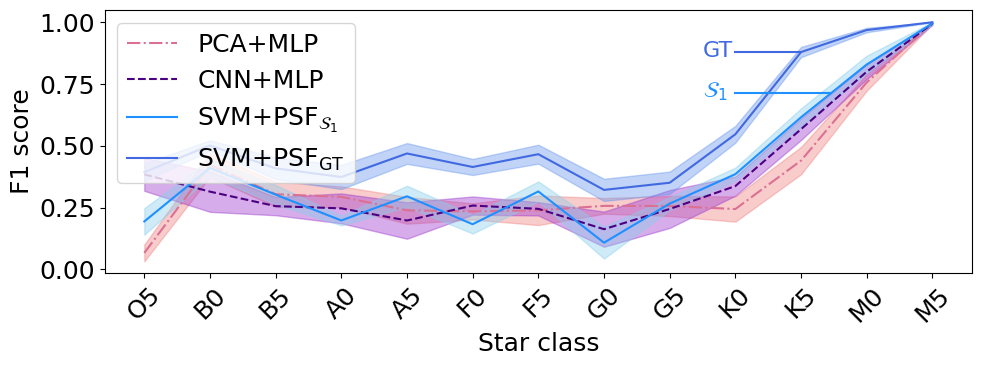

In [8]:
# plot the f1 resuts
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,4))
# plt.grid(alpha=0.3)
plt.plot(np.arange(13), f1_PCA, label='PCA+MLP', linestyle='-.', color=pca_color)
plt.fill_between(np.arange(13), f1_PCA-f1_PCA_std, f1_PCA+f1_PCA_std, alpha=0.4, color=pca_color_2)

plt.plot(np.arange(13), f1_CNN, label='CNN+MLP', color=cnn_color, linestyle='--')
plt.fill_between(np.arange(13), f1_CNN-f1_CNN_std, f1_CNN+f1_CNN_std, alpha=0.4, color=cnn_color_2)

plt.plot(np.arange(13), f1_SVM_list[0], label=r'SVM+PSF$_{\mathcal{S}_1}$', color=svm_s1_color)
plt.fill_between(np.arange(13), f1_SVM_list[0]-f1_SVM_list_std[0], f1_SVM_list[0]+f1_SVM_list_std[0], alpha=0.4, color=svm_s1_color_2)

plt.plot(np.arange(13), f1_SVM, label=r'SVM+PSF$_{\text{GT}}$', color=svm_color)
plt.fill_between(np.arange(13), f1_SVM-f1_SVM_std, f1_SVM+f1_SVM_std, alpha=0.4, color=svm_color_2)



plt.legend(loc='upper left')

plt.xlabel('Star class')
plt.xticks(np.arange(13), star_class_labels, rotation=45)

plt.ylabel('F1 score')
# plt.yticks([0, .5, 1], ['0', '0.5', '1'])

# Add line to point out GT and S1
line_gt = [[9,10],[f1_SVM[10],f1_SVM[10]]]
plt.plot(line_gt[0], line_gt[1], linestyle='-', color=svm_color)
plt.text(8.5, f1_SVM[10]-.02, 'GT', fontsize=16, color=svm_color)

line_s1 = [[9,10.45],[f1_SVM_list[0][10]+.1,f1_SVM_list[0][10]+.1]]
plt.plot(line_s1[0], line_s1[1], linestyle='-', color=svm_s1_color)
plt.text(8.5, f1_SVM_list[0][10]-.02+.1, r'$\mathcal{S}_1$', fontsize=16, color=svm_s1_color)

plt.tight_layout()
# plt.show()
plt.savefig('../figures/f1_score.pdf')

# Accuracy per class

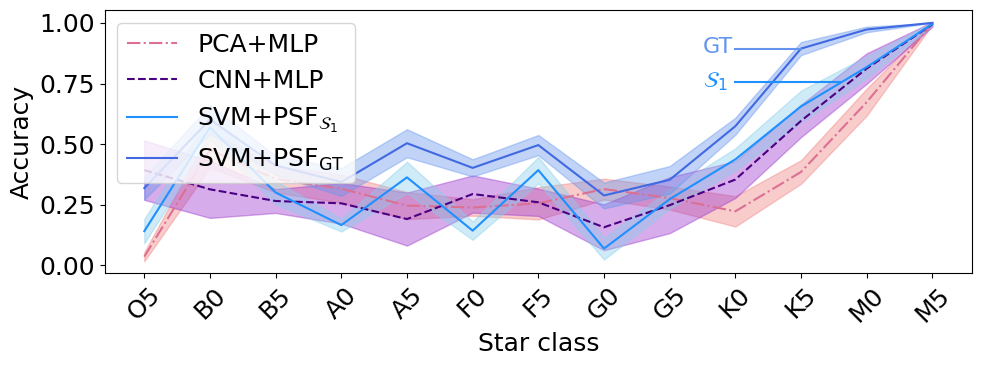

In [9]:
# Svm accuracy per class
accuracy_per_class_svm_gt = np.mean([np.diag(rand_cm)/np.sum(rand_cm, axis=1) for rand_cm in cm_gt], axis=0)
accuracy_per_class_std_svm_gt = np.std([np.diag(rand_cm)/np.sum(rand_cm, axis=1) for rand_cm in cm_gt], axis=0)
accuracy_per_class_smv_s1 = np.mean([np.diag(rand_cm)/np.sum(rand_cm, axis=1) for rand_cm in cm_SVM.swapaxes(0,1)[0]], axis=0)
accuracy_per_class_std_smv_s1 = np.std([np.diag(rand_cm)/np.sum(rand_cm, axis=1) for rand_cm in cm_SVM.swapaxes(0,1)[0]], axis=0)

# CNN accuracy per class
accuracy_per_class_cnn = np.mean([np.diag(rand_cm)/np.sum(rand_cm, axis=1) for rand_cm in cm_CNN_list], axis=0)
accuracy_per_class_std_cnn = np.std([np.diag(rand_cm)/np.sum(rand_cm, axis=1) for rand_cm in cm_CNN_list], axis=0)

# PCA accuracy per class
accuracy_per_class_pca = np.mean([np.diag(rand_cm)/np.sum(rand_cm, axis=1) for rand_cm in cm_PCA_list], axis=0)
accuracy_per_class_std_pca = np.std([np.diag(rand_cm)/np.sum(rand_cm, axis=1) for rand_cm in cm_PCA_list], axis=0)

# Plot the accuracy per class results
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,4))
# plt.grid(alpha=0.3)
plt.plot(np.arange(13), accuracy_per_class_pca, label='PCA+MLP', linestyle='-.', color='palevioletred')
plt.fill_between(np.arange(13), accuracy_per_class_pca-accuracy_per_class_std_pca, accuracy_per_class_pca+accuracy_per_class_std_pca, alpha=0.4, color='lightcoral')

plt.plot(np.arange(13), accuracy_per_class_cnn, label='CNN+MLP', color='indigo', linestyle='--')
plt.fill_between(np.arange(13), accuracy_per_class_cnn-accuracy_per_class_std_cnn, accuracy_per_class_cnn+accuracy_per_class_std_cnn, alpha=0.4, color='darkorchid')

plt.plot(np.arange(13), accuracy_per_class_smv_s1, label=r'SVM+PSF$_{\mathcal{S}_1}$', color='dodgerblue')
plt.fill_between(np.arange(13), accuracy_per_class_smv_s1-accuracy_per_class_std_smv_s1, accuracy_per_class_smv_s1+accuracy_per_class_std_smv_s1, alpha=0.4, color='skyblue')

plt.plot(np.arange(13), accuracy_per_class_svm_gt, label=r'SVM+PSF$_{\text{GT}}$', color='royalblue')
plt.fill_between(np.arange(13), accuracy_per_class_svm_gt-accuracy_per_class_std_svm_gt, accuracy_per_class_svm_gt+accuracy_per_class_std_svm_gt, alpha=0.4, color='cornflowerblue')

plt.legend(loc='upper left')

plt.xlabel('Star class')
plt.xticks(np.arange(13), star_class_labels, rotation=45)

plt.ylabel('Accuracy')
# plt.yticks([0, .5, 1], ['0', '0.5', '1'])

# Add line to point out GT and S1
line_gt = [[9,10],[accuracy_per_class_svm_gt[10],accuracy_per_class_svm_gt[10]]]
plt.plot(line_gt[0], line_gt[1], linestyle='-', color='cornflowerblue')
plt.text(8.5, accuracy_per_class_svm_gt[10]-.02, 'GT', fontsize=16, color='cornflowerblue')

line_s1 = [[9,10.6],[accuracy_per_class_smv_s1[10]+.1,accuracy_per_class_smv_s1[10]+.1]]
plt.plot(line_s1[0], line_s1[1], linestyle='-', color='dodgerblue')
plt.text(8.5, accuracy_per_class_smv_s1[10]-.02+.1, r'$\mathcal{S}_1$', fontsize=16, color='dodgerblue')

plt.tight_layout()
# plt.show()
plt.savefig('../figures/accuracy_per_class.pdf')



In [10]:
print('Acc per class:', 'O5  ','B0   ','B5   ','A0   ','A5   ','F0   ','F5   ','G0   ','G5   ','K0   ','K5   ','M0   ','M5   ')
print('PCA:          {} {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}'.format(*np.around(accuracy_per_class_pca, 2)))
print('CNN:          {} {}  {}  {}  {}  {}  {}  {}  {}  {}  {}   {}  {}'.format(*np.around(accuracy_per_class_cnn, 2)))
print('SVM s1:       {} {}   {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}'.format(*np.around(accuracy_per_class_smv_s1, 2)))
print('SVM:          {} {}   {}  {}   {}   {}  {}   {}  {}  {}  {}  {}  {}'.format(*np.around(accuracy_per_class_svm_gt, 2)))

Acc per class: O5   B0    B5    A0    A5    F0    F5    G0    G5    K0    K5    M0    M5   
PCA:          0.04 0.48  0.36  0.32  0.25  0.24  0.26  0.31  0.28  0.22  0.39  0.67  1.0
CNN:          0.39 0.31  0.27  0.26  0.19  0.29  0.26  0.16  0.25  0.35  0.6   0.81  0.99
SVM s1:       0.14 0.57   0.3  0.17  0.36  0.14  0.39  0.07  0.27  0.44  0.66  0.82  1.0
SVM:          0.32 0.6   0.41  0.34   0.5   0.4  0.5   0.29  0.35  0.57  0.89  0.97  1.0


# Top-2 accuracy per class

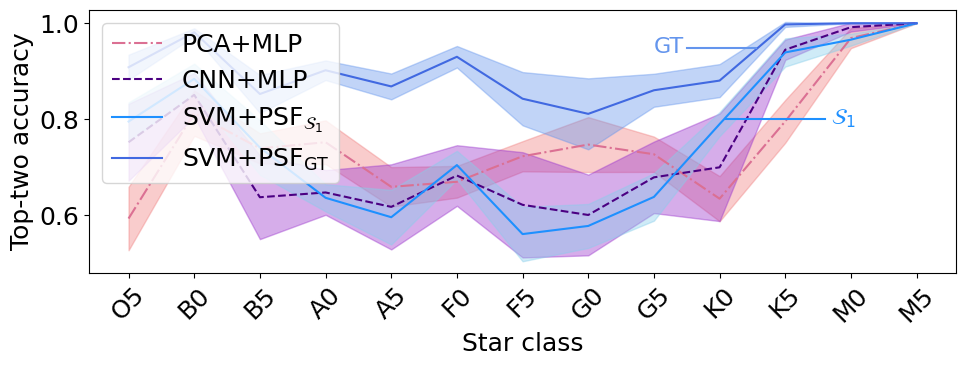

In [11]:
# SVM top-2 accuracy per class
top_2_accuracy_per_class_svm_gt = np.mean([(np.append(0,np.diag(rand_cm, k=-1)) + np.diag(rand_cm) + np.append(np.diag(rand_cm, k=1),0)) / np.sum(rand_cm, axis=1) for rand_cm in cm_gt], axis=0)
top_2_accuracy_per_class_std_svm_gt = np.std([(np.append(0,np.diag(rand_cm, k=-1)) + np.diag(rand_cm) + np.append(np.diag(rand_cm, k=1),0)) / np.sum(rand_cm, axis=1) for rand_cm in cm_gt], axis=0)
top_2_accuracy_per_class_smv_s1 = np.mean([(np.append(0,np.diag(rand_cm, k=-1)) + np.diag(rand_cm) + np.append(np.diag(rand_cm, k=1),0)) / np.sum(rand_cm, axis=1) for rand_cm in cm_SVM.swapaxes(0,1)[0]], axis=0)
top_2_accuracy_per_class_std_smv_s1 = np.std([(np.append(0,np.diag(rand_cm, k=-1)) + np.diag(rand_cm) + np.append(np.diag(rand_cm, k=1),0)) / np.sum(rand_cm, axis=1) for rand_cm in cm_SVM.swapaxes(0,1)[0]], axis=0)

# CNN top-2 accuracy per class
top_2_accuracy_per_class_cnn = np.mean([(np.append(0,np.diag(rand_cm, k=-1)) + np.diag(rand_cm) + np.append(np.diag(rand_cm, k=1),0)) / np.sum(rand_cm, axis=1) for rand_cm in cm_CNN_list], axis=0)
top_2_accuracy_per_class_std_cnn = np.std([(np.append(0,np.diag(rand_cm, k=-1)) + np.diag(rand_cm) + np.append(np.diag(rand_cm, k=1),0)) / np.sum(rand_cm, axis=1) for rand_cm in cm_CNN_list], axis=0)

# PCA top-2 accuracy per class
top_2_accuracy_per_class_pca = np.mean([(np.append(0,np.diag(rand_cm, k=-1)) + np.diag(rand_cm) + np.append(np.diag(rand_cm, k=1),0)) / np.sum(rand_cm, axis=1) for rand_cm in cm_PCA_list], axis=0)
top_2_accuracy_per_class_std_pca = np.std([(np.append(0,np.diag(rand_cm, k=-1)) + np.diag(rand_cm) + np.append(np.diag(rand_cm, k=1),0)) / np.sum(rand_cm, axis=1) for rand_cm in cm_PCA_list], axis=0)

# Plot the top-2 accuracy per class results
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,4))
# plt.grid(alpha=0.3)
plt.plot(np.arange(13), top_2_accuracy_per_class_pca, label='PCA+MLP', linestyle='-.', color='palevioletred')
plt.fill_between(np.arange(13), top_2_accuracy_per_class_pca-top_2_accuracy_per_class_std_pca, top_2_accuracy_per_class_pca+top_2_accuracy_per_class_std_pca, alpha=0.4, color='lightcoral')

plt.plot(np.arange(13), top_2_accuracy_per_class_cnn, label='CNN+MLP', color='indigo', linestyle='--')
plt.fill_between(np.arange(13), top_2_accuracy_per_class_cnn-top_2_accuracy_per_class_std_cnn, top_2_accuracy_per_class_cnn+top_2_accuracy_per_class_std_cnn, alpha=0.4, color='darkorchid')

plt.plot(np.arange(13), top_2_accuracy_per_class_smv_s1, label=r'SVM+PSF$_{\mathcal{S}_1}$', color='dodgerblue')
plt.fill_between(np.arange(13), top_2_accuracy_per_class_smv_s1-top_2_accuracy_per_class_std_smv_s1, top_2_accuracy_per_class_smv_s1+top_2_accuracy_per_class_std_smv_s1, alpha=0.4, color='skyblue')

plt.plot(np.arange(13), top_2_accuracy_per_class_svm_gt, label=r'SVM+PSF$_{\text{GT}}$', color='royalblue')
plt.fill_between(np.arange(13), top_2_accuracy_per_class_svm_gt-top_2_accuracy_per_class_std_svm_gt, top_2_accuracy_per_class_svm_gt+top_2_accuracy_per_class_std_svm_gt, alpha=0.4, color='cornflowerblue')

plt.legend(loc='upper left')

plt.xlabel('Star class')
plt.xticks(np.arange(13), star_class_labels, rotation=45)

plt.ylabel('Top-two accuracy')
# plt.yticks([0, .5, 1], ['0', '0.5', '1'])

# Add line to point out GT and S1
line_gt = [[8.5,9.55],[top_2_accuracy_per_class_svm_gt[10]-.05,top_2_accuracy_per_class_svm_gt[10]-.05]]
plt.plot(line_gt[0], line_gt[1], linestyle='-', color='cornflowerblue')
plt.text(8, top_2_accuracy_per_class_svm_gt[10]-.06, 'GT', fontsize=16, color='cornflowerblue')

line_s1 = [[9.1,10.6],[.8,.8]]
plt.plot(line_s1[0], line_s1[1], linestyle='-', color='dodgerblue')
plt.text(10.7, .79, r'$\mathcal{S}_1$', fontsize=16, color='dodgerblue')

plt.tight_layout()
# plt.show()

plt.savefig('../figures/top_2_accuracy_per_class.pdf')


In [12]:
print('top2 p class:', 'O5  ','B0   ','B5   ','A0   ','A5   ','F0   ','F5   ','G0   ','G5   ','K0   ','K5   ','M0   ','M5   ')
print('PCA:          {} {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}'.format(*np.around(top_2_accuracy_per_class_pca, 2)))
print('CNN:          {} {}  {}  {}  {}  {}  {}  {}   {}  {}   {} {}  {}'.format(*np.around(top_2_accuracy_per_class_cnn, 2)))
print('SVM s1:       {}  {}  {}  {}  {}   {}   {}  {}  {}  {}  {} {}  {}'.format(*np.around(top_2_accuracy_per_class_smv_s1, 2)))
print('SVM:          {} {}  {}  {}   {}  {}  {}  {}  {}  {}  {}  {}   {}'.format(*np.around(top_2_accuracy_per_class_svm_gt, 2)))

top2 p class: O5   B0    B5    A0    A5    F0    F5    G0    G5    K0    K5    M0    M5   
PCA:          0.59 0.81  0.74  0.75  0.66  0.67  0.72  0.75  0.73  0.63  0.8  0.97  1.0
CNN:          0.75 0.85  0.64  0.65  0.62  0.68  0.62  0.6   0.68  0.7   0.94 0.99  1.0
SVM s1:       0.8  0.88  0.74  0.64  0.6   0.7   0.56  0.58  0.64  0.79  0.94 0.97  1.0
SVM:          0.91 0.98  0.85  0.9   0.87  0.93  0.84  0.81  0.86  0.88  1.0  1.0   1.0


In [13]:
# # Other models metrics
# cm_CNN = np.load('CNN_pix_classifier_cm.npy')
# accuracy_CNN = np.trace(cm_CNN)/np.sum(cm_CNN)
# relaxed_accuracy_CNN = (np.trace(cm_CNN, offset=1) + np.trace(cm_CNN, offset=-1) + np.trace(cm_CNN) )/ np.sum(cm_CNN)

# cm_PCA = np.load('PCA_pix_classifier_cm.npy')
# accuracy_PCA = np.trace(cm_PCA)/np.sum(cm_PCA)
# relaxed_accuracy_PCA = (np.trace(cm_PCA, offset=1) + np.trace(cm_PCA, offset=-1) + np.trace(cm_PCA) )/ np.sum(cm_PCA)

# # Define plot font size
# plt.rcParams.update({'font.size': 12})

# # compute the prediction confidence
# low_confidence_bar_relaxed = (1-np.array(confidence_relaxed_list+[confidence_relaxed_gt]))*np.array(relaxed_accuracy_list+[relaxed_accuracy_gt])
# low_confidence_bar = (1-np.array(confidence_list+[confidence_gt]))*np.array(accuracy_list+[accuracy_gt])
# up_confidence_bar = (np.array(p_miss_list+[p_miss_gt]))*(1-np.array(accuracy_list+[accuracy_gt]))
# up_confidence_bar_relaxed = (np.array(p_miss_relaxed_list+[p_miss_relaxed_gt]))*(1-np.array(relaxed_accuracy_list+[relaxed_accuracy_gt]))

# # Plot the accuracy for each dataset
# plt.figure(figsize=(8,5))
# plt.plot(n_stars_list+[4000], accuracy_list+[accuracy_gt], color='royalblue', label='SVM accuracy')
# plt.fill_between(n_stars_list+[4000], accuracy_list+[accuracy_gt]-low_confidence_bar, accuracy_list+[accuracy_gt], color='cornflowerblue' ,alpha=0.3)
# plt.fill_between(n_stars_list+[4000], accuracy_list+[accuracy_gt], accuracy_list+[accuracy_gt]+up_confidence_bar, color='cornflowerblue' ,alpha=0.3)
# plt.axhline(y=accuracy_PCA, color='cornflowerblue', linestyle='-.', label='PCA+FCN accuracy')
# plt.axhline(y=accuracy_CNN, color='cornflowerblue', linestyle='--', label='CNN accuracy')
# plt.plot(n_stars_list+[4000], relaxed_accuracy_list+[relaxed_accuracy_gt], color='darkgoldenrod', label='SVM Top-2 accuracy')
# plt.fill_between(n_stars_list+[4000], relaxed_accuracy_list+[relaxed_accuracy_gt]-low_confidence_bar_relaxed, relaxed_accuracy_list+[relaxed_accuracy_gt], color='goldenrod' ,alpha=0.3)
# plt.fill_between(n_stars_list+[4000], relaxed_accuracy_list+[relaxed_accuracy_gt], relaxed_accuracy_list+[relaxed_accuracy_gt]+up_confidence_bar_relaxed, color='goldenrod' ,alpha=0.3)
# plt.axhline(y=relaxed_accuracy_PCA, color='goldenrod', linestyle='-.', label='PCA+FCN Top-2 accuracy')
# plt.axhline(y=relaxed_accuracy_CNN, color='goldenrod', linestyle='--', label='CNN Top-2 accuracy')
# plt.xlabel('Number of stars in the training set')
# plt.xscale('log')
# plt.ylabel('Classification accuracy')
# plt.ylim(0,1)
# plt.xticks(n_stars_list+[4000], n_stars_list+['GT PSF'])
# plt.title('SVM accuracy vs number of stars in the PSF training set')
# plt.grid()
# plt.legend(loc='lower right')
# plt.show()

In [14]:

# # Plot the accuracy for each dataset
# plt.figure(figsize=(8,5))
# plt.plot(rel_err_1x+[0], accuracy_list+[accuracy_gt], color='royalblue', label='SVM accuracy')
# plt.fill_between(rel_err_1x+[0], accuracy_list+[accuracy_gt]-low_confidence_bar, accuracy_list+[accuracy_gt], color='cornflowerblue' ,alpha=0.3)
# plt.fill_between(rel_err_1x+[0], accuracy_list+[accuracy_gt], accuracy_list+[accuracy_gt]+up_confidence_bar, color='cornflowerblue' ,alpha=0.3)
# plt.axhline(y=accuracy_PCA, color='cornflowerblue', linestyle='-.', label='PCA+FCN accuracy')
# plt.axhline(y=accuracy_CNN, color='cornflowerblue', linestyle='--', label='CNN accuracy')
# plt.plot(rel_err_1x+[0], relaxed_accuracy_list+[relaxed_accuracy_gt], color='darkgoldenrod', label='SVM Top-2 accuracy')
# plt.fill_between(rel_err_1x+[0], relaxed_accuracy_list+[relaxed_accuracy_gt]-low_confidence_bar_relaxed, relaxed_accuracy_list+[relaxed_accuracy_gt], color='goldenrod' ,alpha=0.3)
# plt.fill_between(rel_err_1x+[0], relaxed_accuracy_list+[relaxed_accuracy_gt], relaxed_accuracy_list+[relaxed_accuracy_gt]+up_confidence_bar_relaxed, color='goldenrod' ,alpha=0.3)
# plt.axhline(y=relaxed_accuracy_PCA, color='goldenrod', linestyle='-.', label='PCA+FCN Top-2 accuracy')
# plt.axhline(y=relaxed_accuracy_CNN, color='goldenrod', linestyle='--', label='CNN Top-2 accuracy')
# plt.xlabel('PSF model error [%]')
# plt.ylabel('Classification accuracy')
# plt.ylim(0,1)
# plt.xticks(rel_err_1x+[0], np.round(rel_err_1x+[0],1))
# plt.title('SVM accuracy vs PSF model error')
# # invert x axis
# plt.gca().invert_xaxis()
# plt.grid()
# plt.legend(loc='lower right')
# plt.show()

# Random realisation results

In [15]:
# Join SVM and GT PSF model metrics
mean_accuracy = np.append(accuracy_SVM_list, accuracy_gt)
std_accuracy = np.append(accuracy_std_SVM_list, accuracy_std_gt)
mean_relaxed_accuracy = np.append(relaxed_accuracy_SVM_list, relaxed_accuracy_gt)
std_relaxed_accuracy = np.append(relaxed_accuracy_std_SVM_list, relaxed_accuracy_std_gt)


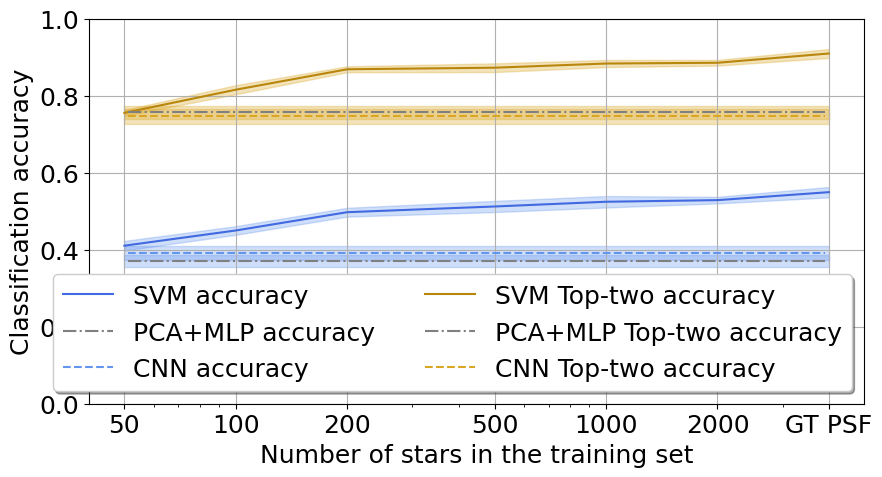

In [16]:
# Plot the accuracy for each dataset
plt.figure(figsize=(10,5))
plt.plot(n_stars_list+[4000], mean_accuracy, color='royalblue', label='SVM accuracy')
plt.fill_between(n_stars_list+[4000], mean_accuracy-std_accuracy, mean_accuracy+std_accuracy, color='cornflowerblue' ,alpha=0.3)

plt.axhline(y=accuracy_PCA_mean, xmin=0.05, xmax=.95, color='gray', linestyle='-.', label='PCA+MLP accuracy')
plt.fill_between(n_stars_list+[4000], accuracy_PCA_mean-accuracy_PCA_std, accuracy_PCA_mean+accuracy_PCA_std, color='cornflowerblue' ,alpha=0.3)

plt.axhline(y=accuracy_CNN_mean, xmin=0.05, xmax=.95, color='cornflowerblue', linestyle='--', label='CNN accuracy')
plt.fill_between(n_stars_list+[4000], accuracy_CNN_mean-accuracy_CNN_std, accuracy_CNN_mean+accuracy_CNN_std, color='cornflowerblue' ,alpha=0.3)

plt.plot(n_stars_list+[4000], mean_relaxed_accuracy, color='darkgoldenrod', label='SVM Top-two accuracy')
plt.fill_between(n_stars_list+[4000], mean_relaxed_accuracy-std_relaxed_accuracy, mean_relaxed_accuracy+std_relaxed_accuracy, color='goldenrod' ,alpha=0.3)

plt.axhline(y=relaxed_accuracy_PCA_mean, xmin=0.05, xmax=.95, color='gray', linestyle='-.', label='PCA+MLP Top-two accuracy')
plt.fill_between(n_stars_list+[4000], relaxed_accuracy_PCA_mean-relaxed_accuracy_PCA_std, relaxed_accuracy_PCA_mean+relaxed_accuracy_PCA_std, color='goldenrod' ,alpha=0.3)

plt.axhline(y=relaxed_accuracy_CNN_mean, xmin=0.05, xmax=.95, color='goldenrod', linestyle='--', label='CNN Top-two accuracy')
plt.fill_between(n_stars_list+[4000], relaxed_accuracy_CNN_mean-relaxed_accuracy_CNN_std, relaxed_accuracy_CNN_mean+relaxed_accuracy_CNN_std, color='goldenrod' ,alpha=0.3)

plt.xlabel('Number of stars in the training set')
plt.xscale('log')
plt.ylabel('Classification accuracy')
plt.ylim(0,1)
plt.xticks(n_stars_list+[4000], n_stars_list+['GT PSF'])
# plt.title('Accuracy vs PSF model error', fontsize=22)
plt.grid()
plt.legend(loc='lower right', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1, 0))
plt.show()

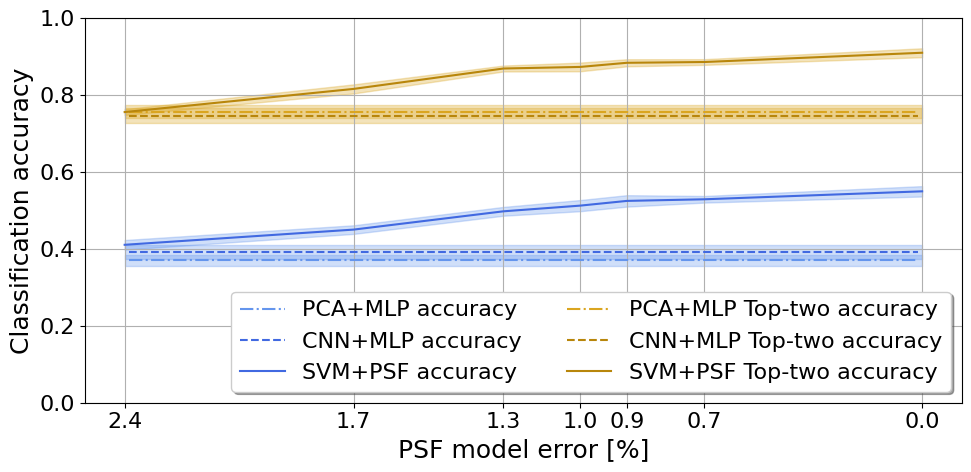

In [17]:
rel_err_1x = np.load('../approx_PSF_models/rel_err_1x.npy').tolist()
plt.rcParams.update({'font.size': 16})

# Plot the accuracy for each dataset
plt.figure(figsize=(10,5))

plt.axhline(y=accuracy_PCA_mean, xmin=0.05, xmax=.95, color='cornflowerblue', linestyle='-.', label='PCA+MLP accuracy')
plt.fill_between(rel_err_1x+[0], accuracy_PCA_mean-accuracy_PCA_std, accuracy_PCA_mean+accuracy_PCA_std, color='cornflowerblue' ,alpha=0.3)

plt.axhline(y=accuracy_CNN_mean, xmin=0.05, xmax=.95, color='royalblue', linestyle='--', label='CNN+MLP accuracy')
plt.fill_between(rel_err_1x+[0], accuracy_CNN_mean-accuracy_CNN_std, accuracy_CNN_mean+accuracy_CNN_std, color='cornflowerblue' ,alpha=0.3)

plt.plot(rel_err_1x+[0], mean_accuracy, color='royalblue', label='SVM+PSF accuracy')
plt.fill_between(rel_err_1x+[0], mean_accuracy-std_accuracy, mean_accuracy+std_accuracy, color='cornflowerblue' ,alpha=0.3)

plt.axhline(y=relaxed_accuracy_PCA_mean, xmin=0.05, xmax=.95, color='goldenrod', linestyle='-.', label='PCA+MLP Top-two accuracy')
plt.fill_between(rel_err_1x+[0], relaxed_accuracy_PCA_mean-relaxed_accuracy_PCA_std, relaxed_accuracy_PCA_mean+relaxed_accuracy_PCA_std, color='goldenrod' ,alpha=0.3)

plt.axhline(y=relaxed_accuracy_CNN_mean, xmin=0.05, xmax=.95, color='darkgoldenrod', linestyle='--', label='CNN+MLP Top-two accuracy')
plt.fill_between(rel_err_1x+[0], relaxed_accuracy_CNN_mean-relaxed_accuracy_CNN_std, relaxed_accuracy_CNN_mean+relaxed_accuracy_CNN_std, color='goldenrod' ,alpha=0.3)

plt.plot(rel_err_1x+[0], mean_relaxed_accuracy, color='darkgoldenrod', label='SVM+PSF Top-two accuracy')
plt.fill_between(rel_err_1x+[0], mean_relaxed_accuracy-std_relaxed_accuracy, mean_relaxed_accuracy+std_relaxed_accuracy, color='goldenrod' ,alpha=0.3)

plt.xlabel('PSF model error [%]', fontsize=18)
plt.ylabel('Classification accuracy', fontsize=18)
plt.ylim(0,1)
plt.xticks(rel_err_1x+[0], np.round(rel_err_1x+[0],1))
# plt.title('Accuracy vs PSF model error', fontsize=22)
plt.gca().invert_xaxis()
plt.grid()
plt.legend(loc='lower right', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1, 0))
# plt.show()
plt.tight_layout()
# plt.savefig('../figures/SVM_accuracy_vs_PSF_error.pdf')

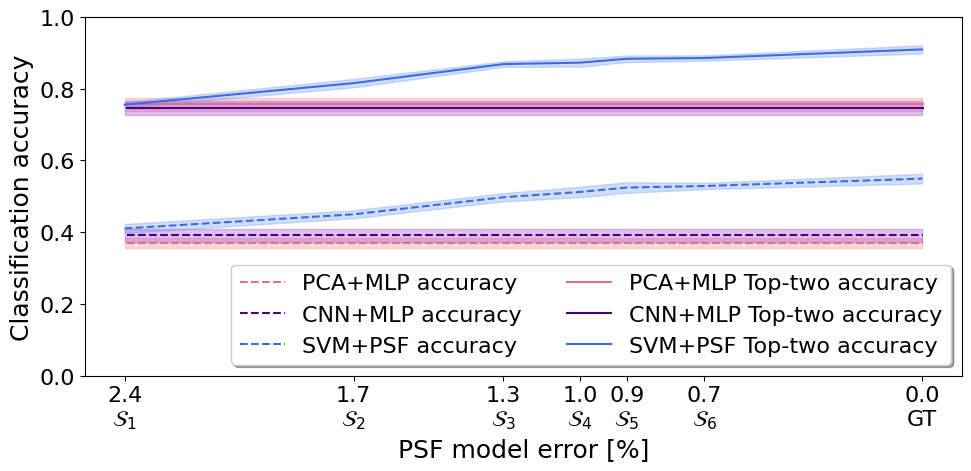

In [18]:
rel_err_1x = np.load('../approx_PSF_models/rel_err_1x.npy').tolist()
plt.rcParams.update({'font.size': 16})

# Plot the accuracy for each dataset
plt.figure(figsize=(10,5))

plt.axhline(y=accuracy_PCA_mean, xmin=0.048, xmax=.955, color='palevioletred', linestyle='--', label='PCA+MLP accuracy')
plt.fill_between(rel_err_1x+[0], accuracy_PCA_mean-accuracy_PCA_std, accuracy_PCA_mean+accuracy_PCA_std, color='lightcoral' ,alpha=0.3)

plt.axhline(y=accuracy_CNN_mean, xmin=0.048, xmax=.955, color='indigo', linestyle='--', label='CNN+MLP accuracy')
plt.fill_between(rel_err_1x+[0], accuracy_CNN_mean-accuracy_CNN_std, accuracy_CNN_mean+accuracy_CNN_std, color='darkorchid' ,alpha=0.3)

plt.plot(rel_err_1x+[0], mean_accuracy, color='royalblue', linestyle='--', label='SVM+PSF accuracy')
plt.fill_between(rel_err_1x+[0], mean_accuracy-std_accuracy, mean_accuracy+std_accuracy, color='cornflowerblue' ,alpha=0.3)

plt.axhline(y=relaxed_accuracy_PCA_mean, xmin=0.048, xmax=.955, color='palevioletred', linestyle='-', label='PCA+MLP Top-two accuracy')
plt.fill_between(rel_err_1x+[0], relaxed_accuracy_PCA_mean-relaxed_accuracy_PCA_std, relaxed_accuracy_PCA_mean+relaxed_accuracy_PCA_std, color='lightcoral' ,alpha=0.3)

plt.axhline(y=relaxed_accuracy_CNN_mean, xmin=0.048, xmax=.955, color='indigo', linestyle='-', label='CNN+MLP Top-two accuracy')
plt.fill_between(rel_err_1x+[0], relaxed_accuracy_CNN_mean-relaxed_accuracy_CNN_std, relaxed_accuracy_CNN_mean+relaxed_accuracy_CNN_std, color='darkorchid' ,alpha=0.3)

plt.plot(rel_err_1x+[0], mean_relaxed_accuracy, color='royalblue', label='SVM+PSF Top-two accuracy')
plt.fill_between(rel_err_1x+[0], mean_relaxed_accuracy-std_relaxed_accuracy, mean_relaxed_accuracy+std_relaxed_accuracy, color='cornflowerblue' ,alpha=0.3)

plt.xlabel('PSF model error [%]', fontsize=18)
plt.ylabel('Classification accuracy', fontsize=18)
plt.ylim(0,1)
plt.xticks(rel_err_1x+[0], [str(err_str)+'\n'+r'$\mathcal{{S}}_{{{}}}$'.format(i+1) for i, err_str in enumerate(np.round(rel_err_1x,1))]+['0.0\nGT'])
# plt.title('Accuracy vs PSF model error', fontsize=22)
plt.gca().invert_xaxis()
# plt.grid()
plt.legend(loc='lower right', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1, 0))
# plt.show()
plt.tight_layout()
plt.savefig('../figures/SVM_accuracy_vs_PSF_error.pdf')

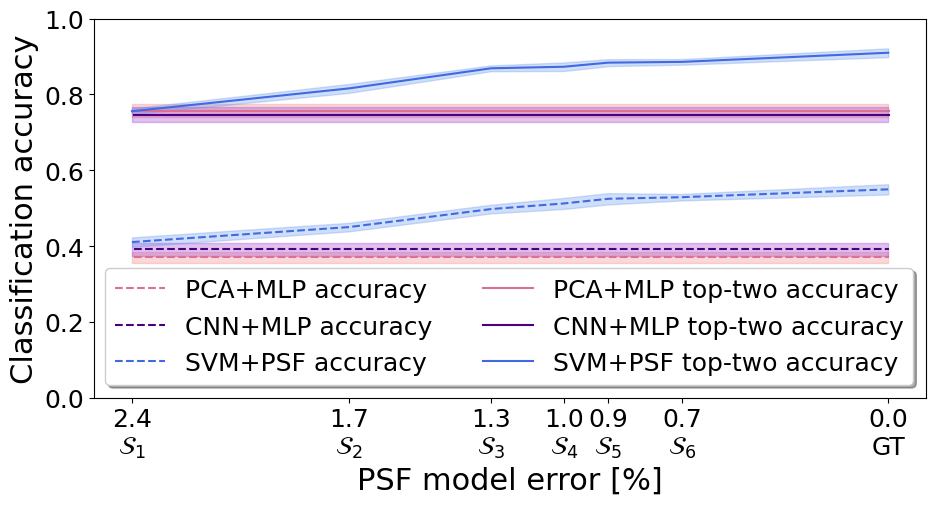

In [28]:
rel_err_1x = np.load('../approx_PSF_models/rel_err_1x.npy').tolist()
plt.rcParams.update({'font.size': 18})

# Plot the accuracy for each dataset
plt.figure(figsize=(9.7,5.4))

plt.axhline(y=accuracy_PCA_mean, xmin=0.048, xmax=.955, color='palevioletred', linestyle='--', label='PCA+MLP accuracy')
plt.fill_between(rel_err_1x+[0], accuracy_PCA_mean-accuracy_PCA_std, accuracy_PCA_mean+accuracy_PCA_std, color='lightcoral' ,alpha=0.3)

plt.axhline(y=accuracy_CNN_mean, xmin=0.048, xmax=.955, color='indigo', linestyle='--', label='CNN+MLP accuracy')
plt.fill_between(rel_err_1x+[0], accuracy_CNN_mean-accuracy_CNN_std, accuracy_CNN_mean+accuracy_CNN_std, color='darkorchid' ,alpha=0.3)

plt.plot(rel_err_1x+[0], mean_accuracy, color='royalblue', linestyle='--', label='SVM+PSF accuracy')
plt.fill_between(rel_err_1x+[0], mean_accuracy-std_accuracy, mean_accuracy+std_accuracy, color='cornflowerblue' ,alpha=0.3)

plt.axhline(y=relaxed_accuracy_PCA_mean, xmin=0.048, xmax=.955, color='palevioletred', linestyle='-', label='PCA+MLP top-two accuracy')
plt.fill_between(rel_err_1x+[0], relaxed_accuracy_PCA_mean-relaxed_accuracy_PCA_std, relaxed_accuracy_PCA_mean+relaxed_accuracy_PCA_std, color='lightcoral' ,alpha=0.3)

plt.axhline(y=relaxed_accuracy_CNN_mean, xmin=0.048, xmax=.955, color='indigo', linestyle='-', label='CNN+MLP top-two accuracy')
plt.fill_between(rel_err_1x+[0], relaxed_accuracy_CNN_mean-relaxed_accuracy_CNN_std, relaxed_accuracy_CNN_mean+relaxed_accuracy_CNN_std, color='darkorchid' ,alpha=0.3)

plt.plot(rel_err_1x+[0], mean_relaxed_accuracy, color='royalblue', label='SVM+PSF top-two accuracy')
plt.fill_between(rel_err_1x+[0], mean_relaxed_accuracy-std_relaxed_accuracy, mean_relaxed_accuracy+std_relaxed_accuracy, color='cornflowerblue' ,alpha=0.3)

plt.xlabel('PSF model error [%]', fontsize=22)
plt.ylabel('Classification accuracy', fontsize=22)
plt.ylim(0,1)
plt.xticks(rel_err_1x+[0], [str(err_str)+'\n'+r'$\mathcal{{S}}_{{{}}}$'.format(i+1) for i, err_str in enumerate(np.round(rel_err_1x,1))]+['0.0\nGT'])
# plt.title('Accuracy vs PSF model error', fontsize=22)
plt.gca().invert_xaxis()
# plt.grid()
plt.legend(loc='lower right', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1, 0))
# plt.show()
plt.tight_layout()
plt.savefig('../figures/SVM_accuracy_vs_PSF_error_1col.pdf')